In [4]:
import pandas as pd
import os
import numpy as np
import datetime as dt
from shutil import which, copyfileobj
import gzip

LOC = 'ny' # 'ny', 'paris', 'london'

# print(len(os.listdir(f'./data/{LOC}/')))
# if len(os.listdir(f'./data/{LOC}/')) == 0:
# #     if which('wget') is None:
# #         %conda install wget
#     if LOC == 'ny':
#         !wget http://data.insideairbnb.com/united-states/new-york-city/ny/2021-07-06/data/listings.csv.gz
#         !wget http://data.insideairbnb.com/united-states/new-york-city/ny/2021-07-06/data/reviews.csv.gz
#     elif LOC == 'paris':
#         !wget http://data.insideairbnb.com/france/ile-de-france/paris/2021-07-06/data/listings.csv.gz
#         !wget http://data.insideairbnb.com/france/ile-de-france/paris/2021-07-06/data/reviews.csv.gz
#     elif LOC == 'london':
#         !wget http://data.insideairbnb.com/united-kingdom/england/london/2021-07-06/data/listings.csv.gz
#         !wget http://data.insideairbnb.com/united-kingdom/england/london/2021-07-06/data/reviews.csv.gz

#     with gzip.open(f'./reviews.csv.gz', 'rb') as f_in:
#         with open(f'./data/{LOC}/reviews.csv', 'wb') as f_out:
#             copyfileobj(f_in, f_out)
#     with gzip.open(f'./listings.csv.gz', 'rb') as f_in:
#         with open(f'./data/{LOC}/listings.csv', 'wb') as f_out:
#             copyfileobj(f_in, f_out)


In [12]:
filename = f"./data/{LOC}/reviews.csv"
df = pd.read_csv(filename)

In [6]:
import nltk

nltk.download('stopwords')
STOP = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zaina\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [13]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839321 entries, 0 to 839320
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     839321 non-null  int64 
 1   id             839321 non-null  int64 
 2   date           839321 non-null  object
 3   reviewer_id    839321 non-null  int64 
 4   reviewer_name  839314 non-null  object
 5   comments       838509 non-null  object
dtypes: int64(3), object(3)
memory usage: 38.4+ MB


In [15]:
df.comments.astype(str)

0         Notre séjour de trois nuits.\r<br/>Nous avons ...
1                                         Great experience.
2         I've stayed with my friend at the Midtown Cast...
3         We've been staying here for about 9 nights, en...
4         We had a wonderful stay at Jennifer's charming...
                                ...                        
839316                                     Very lovely home
839317    The host canceled this reservation the day bef...
839318    Christopher's place is really well located. It...
839319    Nice place , comfy, all what you need for nice...
839320    Host has been very kind and responsive. <br/>T...
Name: comments, Length: 839321, dtype: object

In [16]:
df.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [19]:
df.comments = df.comments.astype(str)
df.date = pd.to_datetime(df.date)

df = df[df.date > pd.to_datetime(dt.date(2019,12,31))]

In [20]:
def replace_symbols(text):
    text = text.lower()
    symbols = ['.',',','<','\\','/','>','(',')','[',']','-','_','+','=','!','@','#','’','\'',':',';','?','$','&','*']
    for s in symbols:
        if s in text:
            text = text.replace(s, '')
    
    return ' '.join(word for word in text.split() if word not in STOP)


df['review_simple'] = df.comments.apply(replace_symbols)




In [23]:
start_p1 = pd.to_datetime(dt.date(2020,1,1))
end_p1 = pd.to_datetime(dt.date(2020,2,29))
start_p2 = pd.to_datetime(dt.date(2020,3,1))
end_p2 = pd.to_datetime(dt.date(2020,7,31))
start_p3 = pd.to_datetime(dt.date(2020,8,1))
end_p3 = pd.to_datetime(dt.date(2020,12,31))
start_p4 = pd.to_datetime(dt.date(2021,1,1))
end_p4 = pd.to_datetime('today')

In [24]:
df.shape

(194628, 7)

In [25]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_simple
347,3831,588410318,2020-01-04,47646626,Thorsten,We had a nice stay with Lisa in Brooklyn. Espe...,nice stay lisa brooklyn especially tips helpfu...
348,3831,589143289,2020-01-05,23587571,Rodrigo,The location it’s fantastic. Even it’s an enti...,location fantastic even entire place doesnt fe...
349,3831,594037833,2020-01-17,300301942,Sungho,아이들이 있는 집은 최고의 숙소입니다<br/>저희 아이가 주인집 아이들과 매일 같이...,아이들이 있는 집은 최고의 숙소입니다br저희 아이가 주인집 아이들과 매일 같이 놀았...
350,3831,596029798,2020-01-21,109396060,Catalina Fernanda,La estadía fué buena está cerca del metro y de...,la estadía fué buena está cerca del metro de t...
351,3831,597434314,2020-01-25,2308141,Trafton,Lisa Roxanne was a great host and very accomod...,lisa roxanne great host accomodating youre loo...


In [26]:
pre_covid = df[(df.date > start_p1) & (df.date < end_p1)]
covid = df[(df.date > start_p2) & (df.date < end_p2)]
pre_vaccine = df[(df.date > start_p3) & (df.date < end_p3)]
post_vaccine = df[(df.date > start_p4) & (df.date < end_p4)]

In [27]:
print(pre_covid.shape)
print(covid.shape)
print(pre_vaccine.shape)
print(post_vaccine.shape)

(26777, 7)
(24948, 7)
(41782, 7)
(96724, 7)


In [28]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_simple
347,3831,588410318,2020-01-04,47646626,Thorsten,We had a nice stay with Lisa in Brooklyn. Espe...,nice stay lisa brooklyn especially tips helpfu...
348,3831,589143289,2020-01-05,23587571,Rodrigo,The location it’s fantastic. Even it’s an enti...,location fantastic even entire place doesnt fe...
349,3831,594037833,2020-01-17,300301942,Sungho,아이들이 있는 집은 최고의 숙소입니다<br/>저희 아이가 주인집 아이들과 매일 같이...,아이들이 있는 집은 최고의 숙소입니다br저희 아이가 주인집 아이들과 매일 같이 놀았...
350,3831,596029798,2020-01-21,109396060,Catalina Fernanda,La estadía fué buena está cerca del metro y de...,la estadía fué buena está cerca del metro de t...
351,3831,597434314,2020-01-25,2308141,Trafton,Lisa Roxanne was a great host and very accomod...,lisa roxanne great host accomodating youre loo...


In [73]:
pre_covid_activity = pre_covid.groupby(pre_covid['listing_id']).size()
pre_covid_activity = pd.DataFrame(pre_covid_activity.reset_index("listing_id"))
pre_covid_activity.columns = ['id', 'pre_covid_activity']
pre_covid_activity.head()

,id,pre_covid_activity
0,3831,14
1,5178,10
2,5803,1
3,6848,2
4,7097,4


In [75]:
pre_covid_activity = pre_covid.groupby(pre_covid['listing_id']).size()
covid_activity = covid.groupby(covid['listing_id']).size()
pre_vaccine_activity = pre_vaccine.groupby(pre_vaccine['listing_id']).size()
post_vaccine_activity = post_vaccine.groupby(post_vaccine['listing_id']).size()

pre_covid_activity = pd.DataFrame(pre_covid_activity.reset_index("listing_id"))
pre_covid_activity.columns = ['id', 'pre_covid_activity']

covid_activity = pd.DataFrame(covid_activity.reset_index("listing_id"))
covid_activity.columns = ['id', 'covid_activity']

pre_vaccine_activity = pd.DataFrame(pre_vaccine_activity.reset_index("listing_id"))
pre_vaccine_activity.columns = ['id', 'pre_vaccine_activity']

post_vaccine_activity = pd.DataFrame(post_vaccine_activity.reset_index("listing_id"))
post_vaccine_activity.columns = ['id', 'post_vaccine_activity']

pre_covid_activity

,id,pre_covid_activity
0,3831,14
1,5178,10
2,5803,1
3,6848,2
4,7097,4
...,...,...
7741,42475458,1
7742,42543019,1
7743,42561259,1
7744,42830099,5


In [45]:
filename = f"./data/{LOC}/listings.csv"
lst = pd.read_csv(filename)
lst.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210804005827,2021-08-04,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.34
1,3831,https://www.airbnb.com/rooms/3831,20210804005827,2021-08-04,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,4.81,4.72,4.65,NaN,f,1,1,0,0,5.09
2,5121,https://www.airbnb.com/rooms/5121,20210804005827,2021-08-04,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,1,0,1,0,0.55
3,5136,https://www.airbnb.com/rooms/5136,20210804005827,2021-08-04,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.00,5.00,NaN,f,1,1,0,0,0.01
4,5178,https://www.airbnb.com/rooms/5178,20210804005827,2021-08-04,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.40,4.86,4.35,NaN,f,1,0,1,0,3.63


In [90]:
pre_covid_activity = pre_covid.groupby(pre_covid['listing_id']).size()
covid_activity = covid.groupby(covid['listing_id']).size()
pre_vaccine_activity = pre_vaccine.groupby(pre_vaccine['listing_id']).size()
post_vaccine_activity = post_vaccine.groupby(post_vaccine['listing_id']).size()

pre_covid_activity = pd.DataFrame(pre_covid_activity.reset_index("listing_id"))
pre_covid_activity.columns = ['id', 'pre_covid_activity']

covid_activity = pd.DataFrame(covid_activity.reset_index("listing_id"))
covid_activity.columns = ['id', 'covid_activity']

pre_vaccine_activity = pd.DataFrame(pre_vaccine_activity.reset_index("listing_id"))
pre_vaccine_activity.columns = ['id', 'pre_vaccine_activity']

post_vaccine_activity = pd.DataFrame(post_vaccine_activity.reset_index("listing_id"))
post_vaccine_activity.columns = ['id', 'post_vaccine_activity']

filename = f"./data/{LOC}/listings.csv"
lst = pd.read_csv(filename)

lst_merged = pd.merge(lst, pre_covid_activity, how="left", on=["id", "id"])
lst_merged = pd.merge(lst_merged, covid_activity, how="left", on=["id", "id"])
lst_merged = pd.merge(lst_merged, pre_vaccine_activity, how="left", on=["id", "id"])
lst_merged = pd.merge(lst_merged, post_vaccine_activity, how="left", on=["id", "id"])

0    $150.00
1     $75.00
2     $60.00
3    $275.00
4     $61.00
Name: price, dtype: object

In [116]:
lst_merged.price = lst_merged.price.str.replace('$', '')
lst_merged.price = lst_merged.price.str.replace(',', '')
lst_merged.price = lst_merged.price.astype(float)

AttributeError: Can only use .str accessor with string values!

In [117]:
print(lst_merged[['accommodates', 'price','reviews_per_month','pre_covid_activity',
                 'covid_activity','pre_vaccine_activity','post_vaccine_activity']].describe())

       accommodates         price  reviews_per_month  pre_covid_activity  \
count  36724.000000  36724.000000       27309.000000         7746.000000   
mean       2.800920    160.109057           1.375435            3.456881   
std        1.869686    293.888431           3.850175            4.560816   
min        0.000000      0.000000           0.010000            1.000000   
25%        2.000000     67.000000           0.110000            1.000000   
50%        2.000000    108.000000           0.420000            2.000000   
75%        4.000000    175.000000           1.450000            5.000000   
max       16.000000  10000.000000         192.930000          217.000000   

       covid_activity  pre_vaccine_activity  post_vaccine_activity  
count     6741.000000           7128.000000           11494.000000  
mean         3.700935              5.861672               8.415173  
std          6.837159             11.186805              14.948063  
min          1.000000              1.00

In [129]:
print(lst_merged[['accommodates', 'price','reviews_per_month','review_scores_rating',
                  'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication','review_scores_location', 
                  'review_scores_value','pre_covid_activity','covid_activity','pre_vaccine_activity',
                  'post_vaccine_activity']].describe())



       accommodates         price  reviews_per_month  review_scores_rating  \
count  36724.000000  36724.000000       27309.000000          27309.000000   
mean       2.800920    160.109057           1.375435              4.574993   
std        1.869686    293.888431           3.850175              0.863975   
min        0.000000      0.000000           0.010000              0.000000   
25%        2.000000     67.000000           0.110000              4.560000   
50%        2.000000    108.000000           0.420000              4.820000   
75%        4.000000    175.000000           1.450000              5.000000   
max       16.000000  10000.000000         192.930000              5.000000   

       review_scores_accuracy  review_scores_cleanliness  \
count            26661.000000               26672.000000   
mean                 4.751773                   4.612116   
std                  0.485873                   0.572336   
min                  0.000000                   0.000000 

In [120]:
pre_covid_lst = lst_merged[lst_merged.pre_covid_activity.notnull()]
covid_lst = lst_merged[lst_merged.covid_activity.notnull()]
pre_vaccine_lst = lst_merged[lst_merged.pre_vaccine_activity.notnull()]
post_vaccine_lst = lst_merged[lst_merged.post_vaccine_activity.notnull()]

In [130]:
print(pre_covid_lst[['accommodates', 'price','reviews_per_month','review_scores_rating',
                  'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication','review_scores_location', 
                  'review_scores_value','pre_covid_activity']].describe())

       accommodates        price  reviews_per_month  review_scores_rating  \
count   7746.000000  7746.000000        7746.000000           7746.000000   
mean       3.105732   149.930545           2.075053              4.736689   
std        2.023695   270.059258           4.513558              0.347713   
min        0.000000     0.000000           0.030000              0.000000   
25%        2.000000    69.000000           0.560000              4.652500   
50%        2.000000   104.500000           1.390000              4.810000   
75%        4.000000   169.000000           2.510000              4.920000   
max       16.000000  9999.000000         174.000000              5.000000   

       review_scores_accuracy  review_scores_cleanliness  \
count             7730.000000                7730.000000   
mean                 4.813605                   4.708298   
std                  0.252435                   0.321337   
min                  1.000000                   1.000000   
25%   

In [131]:
print(covid_lst[['accommodates', 'price','reviews_per_month','review_scores_rating',
                  'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication','review_scores_location', 
                  'review_scores_value','covid_activity']].describe())

       accommodates        price  reviews_per_month  review_scores_rating  \
count   6741.000000  6741.000000        6741.000000           6741.000000   
mean       3.156505   147.610740           2.474057              4.723799   
std        2.070561   256.164087           5.382122              0.382942   
min        0.000000     0.000000           0.030000              0.000000   
25%        2.000000    68.000000           0.620000              4.650000   
50%        2.000000   105.000000           1.570000              4.810000   
75%        4.000000   167.000000           2.780000              4.920000   
max       16.000000  9999.000000         174.000000              5.000000   

       review_scores_accuracy  review_scores_cleanliness  \
count             6727.000000                6727.000000   
mean                 4.795790                   4.702885   
std                  0.299005                   0.348060   
min                  1.000000                   1.000000   
25%   

In [132]:
print(pre_vaccine_lst[['accommodates', 'price','reviews_per_month','review_scores_rating',
                  'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication','review_scores_location', 
                  'review_scores_value','pre_vaccine_activity']].describe())

       accommodates        price  reviews_per_month  review_scores_rating  \
count   7128.000000  7128.000000        7128.000000           7128.000000   
mean       3.182941   154.836841           2.753535              4.716277   
std        2.090805   232.602250           5.705300              0.381082   
min        0.000000     0.000000           0.020000              1.000000   
25%        2.000000    70.000000           0.500000              4.630000   
50%        2.000000   115.000000           1.480000              4.810000   
75%        4.000000   175.000000           2.890000              4.930000   
max       16.000000  9999.000000         131.320000              5.000000   

       review_scores_accuracy  review_scores_cleanliness  \
count             7128.000000                7128.000000   
mean                 4.778547                   4.690680   
std                  0.357074                   0.395675   
min                  1.000000                   1.000000   
25%   

In [133]:
print(post_vaccine_lst[['accommodates', 'price','reviews_per_month','review_scores_rating',
                  'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication','review_scores_location', 
                  'review_scores_value','post_vaccine_activity']].describe())

       accommodates         price  reviews_per_month  review_scores_rating  \
count  11494.000000  11494.000000       11494.000000          11494.000000   
mean       3.099356    157.054202           2.668344              4.687350   
std        2.057693    193.791763           5.627454              0.503083   
min        0.000000      0.000000           0.020000              0.000000   
25%        2.000000     72.000000           0.560000              4.620000   
50%        2.000000    117.000000           1.350000              4.820000   
75%        4.000000    180.000000           2.870000              5.000000   
max       16.000000  10000.000000         192.930000              5.000000   

       review_scores_accuracy  review_scores_cleanliness  \
count            11490.000000               11490.000000   
mean                 4.743269                   4.664158   
std                  0.477192                   0.505503   
min                  1.000000                   1.000000 

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

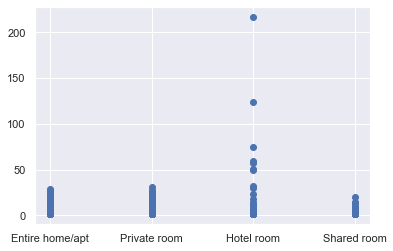

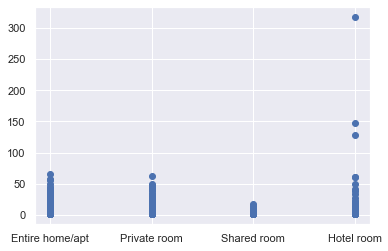

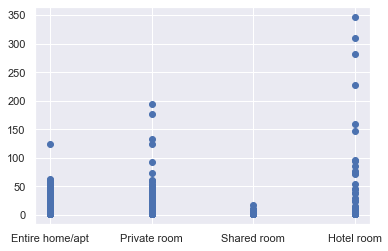

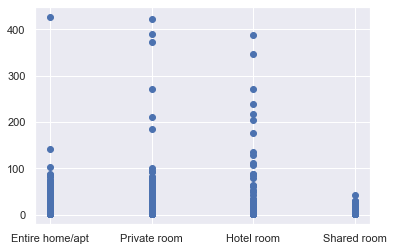

In [160]:
plt.scatter(pre_covid_lst.room_type
             ,pre_covid_lst.pre_covid_activity)

plt.show()
plt.scatter(covid_lst.room_type
             ,covid_lst.covid_activity)
plt.show()
plt.scatter(pre_vaccine_lst.room_type
             ,pre_vaccine_lst.pre_vaccine_activity)
plt.show()
plt.scatter(post_vaccine_lst.room_type
             ,post_vaccine_lst.post_vaccine_activity)

plt.show()
# , 'host_response_rate',
#                                       'host_acceptance_rate', 'host_is_superhost',
#                                       'host_has_profile_pic', 'host_identity_verified',
#                                       'neighbourhood', 'neighbourhood_group_cleansed',
#                                       'property_type', 'room_type', 'accommodates',
#                                       'price' , 'minimum_nights', 'maximum_nights',
#                                       'number_of_reviews','reviews_per_month'

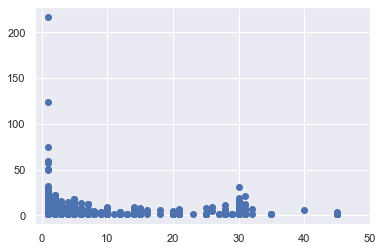

In [165]:
plt.scatter(pre_covid_lst.minimum_nights
             ,pre_covid_lst.pre_covid_activity)

plt.xlim([-1, 50])
plt.show()
# plt.scatter(covid_lst.host_response_rate
#              ,covid_lst.covid_activity)
# # plt.show()
# plt.scatter(pre_vaccine_lst.host_response_rate
#              ,pre_vaccine_lst.pre_vaccine_activity)
# # plt.show()
# plt.scatter(post_vaccine_lst.host_response_rate
#              ,post_vaccine_lst.post_vaccine_activity)

# , 'host_response_rate',
#                                       'host_acceptance_rate', 'host_is_superhost',
#                                       'host_has_profile_pic', 'host_identity_verified',
#                                       'neighbourhood', 'neighbourhood_group_cleansed',
#                                       'property_type', 'room_type', 'accommodates',
#                                       'price' , 'minimum_nights', 'maximum_nights',
#                                       'number_of_reviews','reviews_per_month'

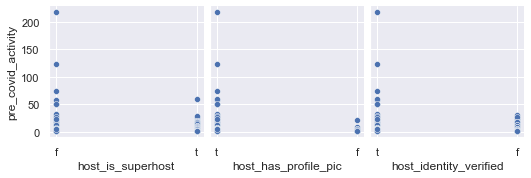

In [192]:
sns.pairplot(pre_covid_lst,x_vars=['host_is_superhost','host_has_profile_pic', 'host_identity_verified'],y_vars=['pre_covid_activity'])

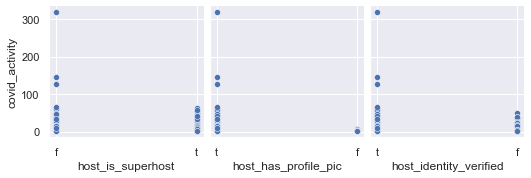

In [193]:
sns.pairplot(covid_lst,x_vars=['host_is_superhost','host_has_profile_pic', 'host_identity_verified'],y_vars=['covid_activity'])

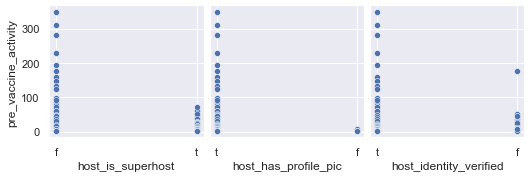

In [194]:
sns.pairplot(pre_vaccine_lst,x_vars=['host_is_superhost','host_has_profile_pic', 'host_identity_verified'],y_vars=['pre_vaccine_activity'])

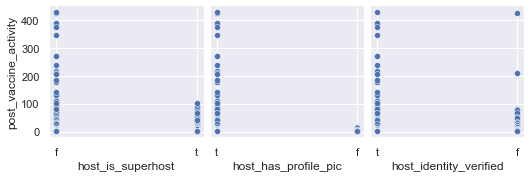

In [196]:
sns.pairplot(post_vaccine_lst,x_vars=['host_is_superhost','host_has_profile_pic', 'host_identity_verified'],y_vars=['post_vaccine_activity'])

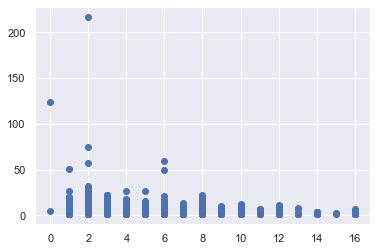

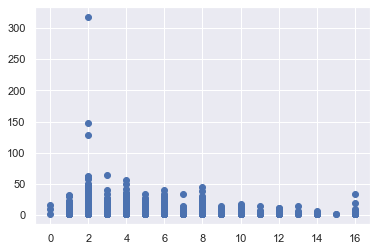

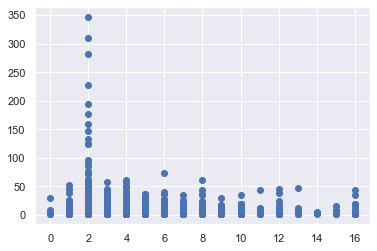

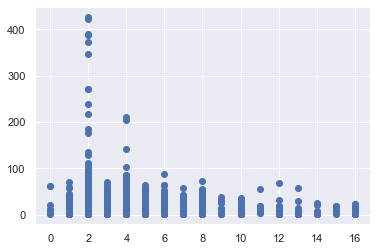

In [181]:
plt.scatter(pre_covid_lst.accommodates,pre_covid_lst.pre_covid_activity)
plt.show()
plt.scatter(covid_lst.accommodates,covid_lst.covid_activity)
plt.show()
plt.scatter(pre_vaccine_lst.accommodates,pre_vaccine_lst.pre_vaccine_activity)
plt.show()
plt.scatter(post_vaccine_lst.accommodates,post_vaccine_lst.post_vaccine_activity)
plt.show()

In [202]:
pre_covid_lst.groupby('neighbourhood')['pre_covid_activity'].sum().reset_index().sort_values('pre_covid_activity')

,neighbourhood,pre_covid_activity
0,"Bushwick,Brooklyn, New York, United States",1.0
68,"New York - Sunnyside , New York, United States",1.0
69,"New York City, New York, United States",1.0
71,"New York, US, New York, United States",1.0
74,"New york, Ny, United States",1.0
...,...,...
16,"Brooklyn , New York, United States",382.0
15,"Bronx, New York, United States",515.0
86,"Queens, New York, United States",2905.0
72,"New York, United States",7637.0


In [187]:
covid_lst.groupby('accommodates')['covid_activity'].sum()

accommodates
0        27.0
1      1786.0
2     12071.0
3      2348.0
4      4221.0
5      1251.0
6      1639.0
7       309.0
8       703.0
9        86.0
10      225.0
11       47.0
12       73.0
13       39.0
14       19.0
15        3.0
16      101.0
Name: covid_activity, dtype: float64

In [190]:
pre_vaccine_lst.groupby('accommodates')['pre_vaccine_activity'].sum()

accommodates
0        45.0
1      2559.0
2     19797.0
3      4148.0
4      7429.0
5      2266.0
6      2782.0
7       507.0
8       992.0
9       139.0
10      426.0
11       99.0
12      251.0
13       76.0
14       26.0
15       38.0
16      202.0
Name: pre_vaccine_activity, dtype: float64

In [191]:
post_vaccine_lst.groupby('accommodates')['post_vaccine_activity'].sum()

accommodates
0       188.0
1      6503.0
2     45309.0
3      8835.0
4     18071.0
5      5482.0
6      6793.0
7      1305.0
8      2270.0
9       242.0
10      684.0
11      202.0
12      321.0
13      139.0
14       71.0
15       84.0
16      225.0
Name: post_vaccine_activity, dtype: float64

In [ ]:
plt.scatter(pre_covid_lst.price,pre_covid_lst.pre_covid_activity)
plt.show()
plt.scatter(pre_covid_lst.number_of_reviews,pre_covid_lst.pre_covid_activity)
plt.show()
plt.scatter(pre_covid_lst.reviews_per_month,pre_covid_lst.pre_covid_activity)